In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv


In [132]:
candy_analysis_path = '/kaggle/input/the-ultimate-halloween-candy-power-ranking/candy-data.csv'
#candy_analysis = pd.read_csv(candy_analysis_path)
df = pd.read_csv(candy_analysis_path)
#candy_analysis.describe()
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [133]:
print('Shape of data', candy_analysis.shape)

Shape of data (85, 13)


In [134]:
candy_analysis.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [136]:
print(df.isnull())

    competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0            False      False   False    False           False   False   
1            False      False   False    False           False   False   
2            False      False   False    False           False   False   
3            False      False   False    False           False   False   
4            False      False   False    False           False   False   
..             ...        ...     ...      ...             ...     ...   
80           False      False   False    False           False   False   
81           False      False   False    False           False   False   
82           False      False   False    False           False   False   
83           False      False   False    False           False   False   
84           False      False   False    False           False   False   

    crispedricewafer   hard    bar  pluribus  sugarpercent  pricepercent  \
0              False  False  False 

In [137]:
print(df.isnull().sum())

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64


In [138]:
#df['chocolate'].value_counts()
#df['fruity'].value_counts()
#df['caramel'].value_counts()
df['peanutyalmondy'].value_counts()
df['nougat'].value_counts()
df['crispedricewafer'].value_counts()
df['hard'].value_counts()
df['bar'].value_counts()
df['pluribus'].value_counts()
df['sugarpercent'].value_counts()
df['pricepercent'].value_counts()
df['winpercent'].value_counts()

winpercent
66.971725    1
72.887901    1
37.887188    1
55.103695    1
63.085140    1
            ..
57.219250    1
28.127439    1
59.236122    1
56.490501    1
49.524113    1
Name: count, Length: 85, dtype: int64

In [139]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [140]:
df.drop(['competitorname'], axis=1)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [141]:
#df['chocolate'].value_counts()
df['fruity'].value_counts()
df['caramel'].value_counts()
df['peanutyalmondy'].value_counts()
df['nougat'].value_counts()
df['crispedricewafer'].value_counts()
df['hard'].value_counts()
df['bar'].value_counts()
df['pluribus'].value_counts()
df['sugarpercent'].value_counts()
df['pricepercent'].value_counts()
df['winpercent'].value_counts()


winpercent
66.971725    1
72.887901    1
37.887188    1
55.103695    1
63.085140    1
            ..
57.219250    1
28.127439    1
59.236122    1
56.490501    1
49.524113    1
Name: count, Length: 85, dtype: int64

In [142]:
# Refer to this Github repo on number 10 and 11 to convert data that are non-int and non-float
# https://gist.github.com/pb111/65dab4818f16ddb58bb6a18a3ba1785b?fbclid=IwAR2hYg0zJG09OQm8lQ5Jb9vesE56TJAgJ6ofRcFHT9-kqWn2Hd-x-h_QwEc

In [144]:
# Declare feature vector and target variable (Here the 'competitorname' column has a value other than int)
X = df
y = df['competitorname']

In [145]:
# Convert Catagorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['competitorname'] = le.fit_transform(X['competitorname'])
y = le.transform(y)

In [146]:
# View the summary of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     int64  
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 8.8 KB


In [147]:
# Preview the dataset X
X.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,44,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,45,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,2,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


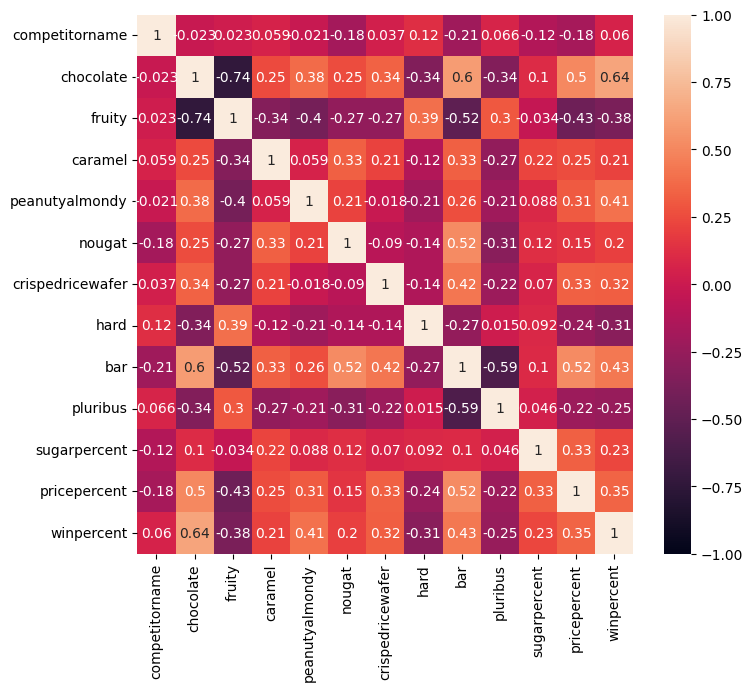

In [148]:
import matplotlib.pyplot as plt # Making plots using matplotlib
import seaborn as sns

plt.subplots(figsize=(8, 7)) # To make sub plots in the plot and adjusting size for the sub plots
#dataset = df[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard',
#             'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1)
plt.show()

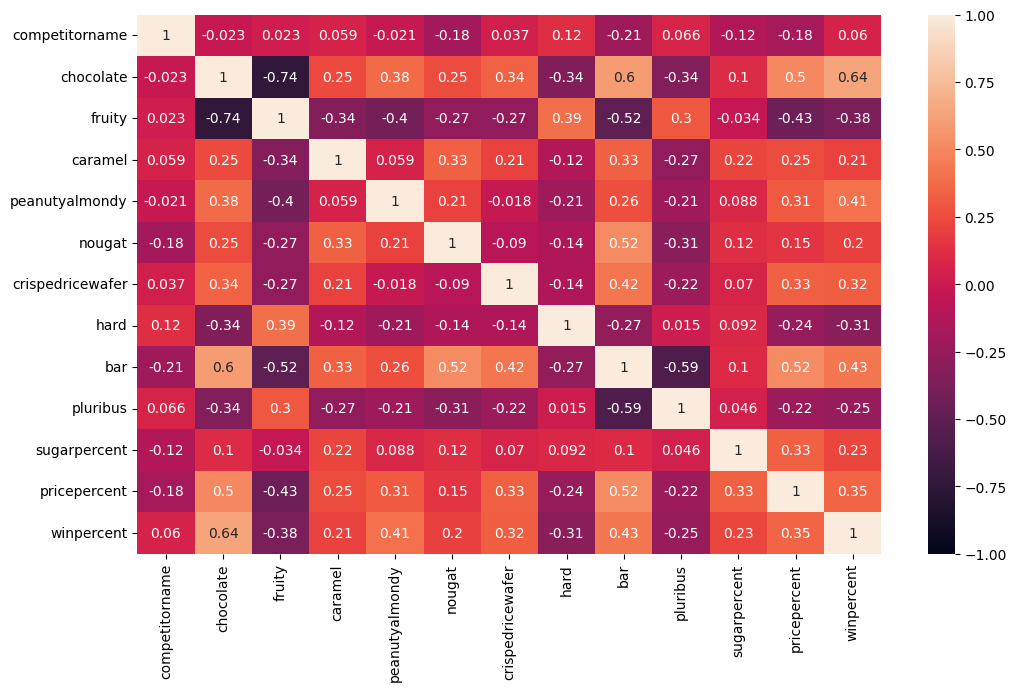

In [149]:
# Another way of showing heatmap (more clearly)
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
# Bar has the highest correlation

In [ ]:
# we are going to predict if a given chocolate is a chocolate bar or not

In [151]:
df.isnull().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

In [152]:
y = df['bar']
X = df.drop('bar', axis = 1)

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [156]:
X

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,pluribus,sugarpercent,pricepercent,winpercent
0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.737973,0.879793,0.721251
1,0.011905,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.606960,0.518135,0.731475
2,0.523810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108808,0.158998
3,0.535714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.518135,0.383432
4,0.023810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916070,0.518135,0.484266
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.952381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.213920,0.108808,0.372900
81,0.964286,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083930,0.108808,0.268350
82,0.976190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.309110,0.312953,0.355231
83,0.988095,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.179120,0.265285,0.315202


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7) 

In [171]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()  # clf is classification
clf.fit(X_train, y_train)

LogisticRegression()

In [172]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0]


In [173]:
# Testing model accuracy
print(f'Logistic Regression Accuracy : {clf.score(X_test, y_test)}')

Logistic Regression Accuracy : 0.8461538461538461


In [177]:
# Testing model accuracy
clf.score(X_test, y_test)

0.8461538461538461